
<center> 

# Bioinformática Avanzada 2025

## TP Nº2: Alineamiento
Daniela Rodríguez Golpe


#### Programa alineador de secuencias de ADN/proteína en función de la elección del usuario


In [ ]:
#Flujo principal del programa resumido
def flowchart_three_lines():
    print("START → Menú (DNA / Proteína) → Leer secuencias → Validar secuencias")
    print("DNA: Dotplot → Filtrar w → Smith-Waterman → Reconstruir → Mostrar alineamiento y dotplot")
    print("Proteína: Smith-Waterman (BLOSUM62) → Reconstruir → Mostrar alineamiento → END")

# Llamar a la función
flowchart_three_lines()

START → Menú (DNA / Proteína) → Leer secuencias → Validar secuencias
DNA: Dotplot → Filtrar w → Smith-Waterman → Reconstruir → Mostrar alineamiento y dotplot
Proteína: Smith-Waterman (BLOSUM62) → Reconstruir → Mostrar alineamiento → END



**SECUENCIAS DE ADN**
- Ejemplo de alineamiento de prueba:

seq1 = "GGAGTAATACGGCT"

seq2 = "CAGTAATACCTG"

- Ejemplo de alineamiento real:
Secuencia ADNmt gen COI atún rojo del sur (*Thunnus maccoyii*)

seq1 = "CATGAGCTGGAATAGTTGGCACGGCCTTAAGCTTGCTCATCCGAGCTGAACTAAGCCAACCAGGTGCCCTTCTTGGGGACGACCAGATCTACAATGTAATCGTTACGGCCCATGCCTTCGTAATGATTTTCTTTATAGTAATACCAATTATGATTGGAGGATTTGGAAACTGACTTATTCCTCTAATGATCGGAGCCCCCGACATGGCATTCCCACGAATGAACAACATGAGCTTCTGACTCCTTCCTCCCTCTTTCCTTCTGCTCCTAGCTTCTTCAGGAGTTGAGGCTGGGGCCGGAACCGGTTGAACAGTCTACCCTCCCCTTGCCGGCAACCTAGCCCACGCAGGGGCATCAGTTGACCTAACTATTTTCTCACTTCACTTAGCAGGGGTTTCCTCAATTCTTGGGGCAATTAACTTCATCACAACAATTATCAATATGAAACCTGCAGCCATCTCTCAATATCAAACACCACTGTTTGTATGAGCTGTACTAATTACAGCTGTTCTTCTTCTACTTTCCCTTCCAGTCCTTGCCGCTGGTATTACAATGCTCCTTACAGACCGAAACCTAAATACAACCTTCTTCGACCCTGCAGGAGGGGGAGACCCAATCCTTTACCAGCATCTATTCTGATTCTTTGGACATCCAGAAGTCT"

Fragmento secuencia ADNmt gen COI atún rojo del sur (*Thunnus maccoyii*)

seq2 = "AGTAATACCAATTATGATTGGAGGATTTGGAAACTGACTTATTC"

**SECUENCIAS DE PROTEINA**
- Ejemplo de alineamiento de prueba

seq1 = "ARNDCEQG"

seq2 = "ARNEEQGH"

- Ejemplo de alineamiento real:
Hemoglobina humana
seq1 = "VLSPADKTNVKAAWGKVGAHAGEY"  

Mioglobina ballena
seq2 = "GLSDGEWQQVLNVWGKVEADIPGH" 


In [17]:

import numpy as np
import matplotlib.pyplot as plt
from Bio import SeqIO
from Bio.Align import substitution_matrices


Valid DNA sequences.
Dotplot matrix:
[[0 0 0 0 0 0 0 0 0 1 0 0 1 0]
 [0 0 1 0 0 1 1 0 1 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 1 0 0 1 0 0 0 0 0 1]
 [0 0 1 0 0 1 1 0 1 0 0 0 0 0]
 [0 0 1 0 0 1 1 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 1 0 0 0 0 0 1]
 [0 0 1 0 0 1 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 1 0 0 1 0 0 0 0 0 1]
 [1 1 0 1 0 0 0 0 0 0 1 1 0 0]]
Dimensiones de la matriz: (12, 14)


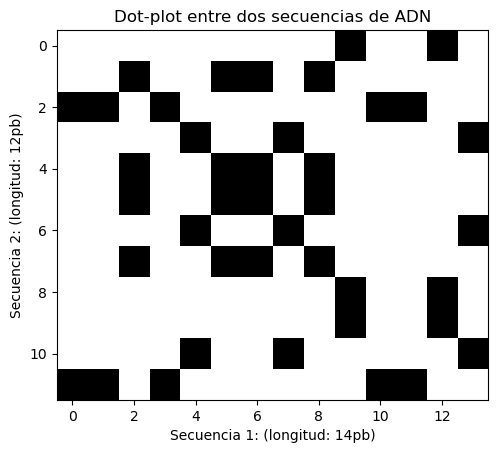

Filter Dotplot matrix:
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
Dimensiones de la matriz reducida: (10, 12)


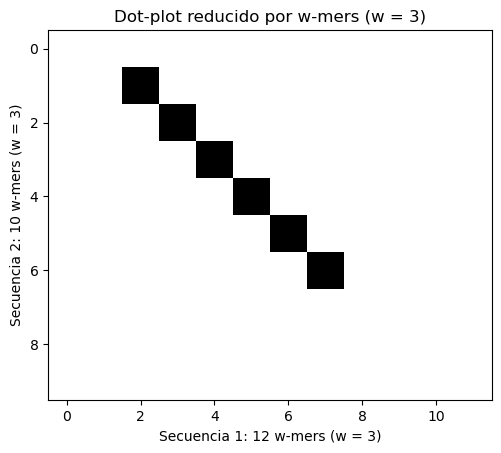


 Camino local encontrado:
[(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7)]
Puntaje total del alineamiento local: 6


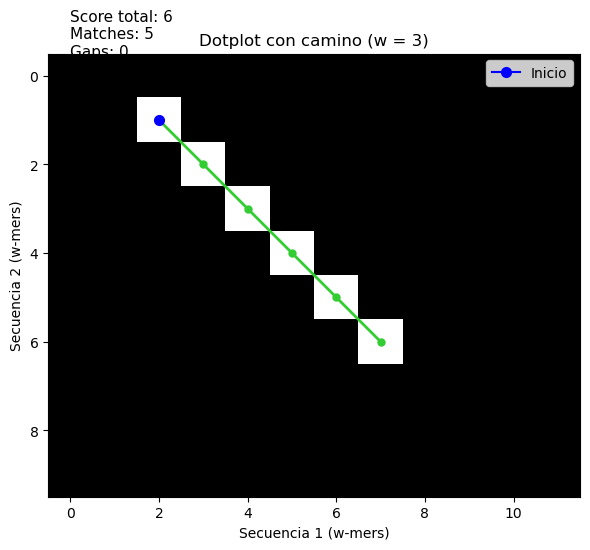

Camino visualizado: 5 matches, 0 gaps, Score total: 6

 Alineamiento local:
Seq1: AGT GTA TAA AAT ATA TAC
      ||||||||||||||||||
Seq2: AGT GTA TAA AAT ATA TAC


In [ ]:
# ----- Bloque 1: Validación de las secuencias dadas por el usuario  -----
def validation_seq(seq, type):
    """Valida que las secuencias dadas sean de ADN o de proteina
    """
    if type == "DNA":
        valid_bases = set("ATCG")
        return all(base in valid_bases for base in seq)
    elif type == "Protein":
        valid_aa = set("ARNDCQEGHILKMFPSTWYV")
        return all(aa in valid_aa for aa in seq)
    else:
        return False


# ----- Bloque 2: Dot-plot -----
def dotplot(seq1,seq2, title="Dot-plot"):
    """Genera un dotplot con las secuencias de ADN y lo grafica
    """
    rows = len(seq2)
    cols = len(seq1)
    matrix = np.zeros((rows,cols), dtype = int)
    for i in range(len(seq2)):
        for n in range(len(seq1)):
            if seq2[i] == seq1[n]:
                matrix[i][n] = 1
    print("Dotplot matrix:")
    print(matrix)
    print("Dimensiones de la matriz:", matrix.shape)
    plt.imshow(matrix, cmap="Greys", interpolation="none")
    plt.xlabel(f"Secuencia 1: (longitud: {cols}pb)")
    plt.ylabel(f"Secuencia 2: (longitud: {rows}pb)")
    plt.title("Dot-plot entre dos secuencias de ADN")
    plt.show()
    return matrix


# ----- Bloque 3: Aplicando filtros al dot-plot -----
def filtered_dotplot(seq1, seq2, w):
    """Aplica un filtro con reduccion.
    Se usa una ventana de tamaño w.
    Se marcan solo aquellas posiciones donde haya w coincidencias consecutivas entre seq1 y seq2.
    Filtro por ventana deslizante con coincidencia exacta. Se avanza de a un nucleótido cada vez.
    """
    rows = len(seq2)- w + 1 #genero una matriz filtrada con shape reducido
    cols = len(seq1)- w + 1 #idem anterior
    matrix = np.zeros((rows, cols), dtype=int)

    for i in range(rows):
        wmer2 = seq2[i:i+w]
        for n in range(cols):
            wmer1 = seq1[n:n+w]
            if wmer1 == wmer2:
                matrix[i][n] = 1

    print("Filter Dotplot matrix:")
    print(matrix)
    print("Dimensiones de la matriz reducida:", matrix.shape)
    plt.imshow(matrix, cmap="Greys", interpolation="none")
    plt.xlabel(f"Secuencia 1: {cols} w-mers (w = {w})")
    plt.ylabel(f"Secuencia 2: {rows} w-mers (w = {w})")
    plt.title(f"Dot-plot reducido por w-mers (w = {w})")
    plt.show()
    return matrix


# ----- Bloque 4: Alineamiento-----
# --- Bloque 4A: Encuentra el camino para el alineamiento local ---
def find_local_alignment(matrix, match_score=1, mismatch_penalty=-1, gap_penalty=-1):
    """Toma la matriz reducida del dotplot filtrado del bloque anterior (matrix).
    Implementa un alineamiento local tipo Smith-Waterman.
    Busca el subcamino de mayor puntaje dentro del dotplot.
    """
    rows, cols = matrix.shape

    # Inicialización de matrices
    # Se suma 1 al tamaño para facilitar la inicialización y evitar errores en bordes.
    score = np.zeros((rows + 1, cols + 1), dtype=int) #guarda el puntaje acumulado máximo hasta cada celda
    traceback = np.full((rows + 1, cols + 1), None) #guarda de dónde vino el puntaje para luego poder reconstruir el camino

    max_score = 0 #guarda el mejor puntaje total
    max_pos = (0, 0) #desde aca se reconstruye el alineamiento

    # Llenado de matrices
    for i in range(1, rows + 1):
        for j in range(1, cols + 1):
            match = match_score if matrix[i - 1][j - 1] == 1 else mismatch_penalty
            #Movimientos permitidos
            diag = score[i - 1][j - 1] + match #avanzar en diagonal (match o mismatch)
            up = score[i - 1][j] + gap_penalty #insertar un gap en seq1
            left = score[i][j - 1] + gap_penalty #insertar un gap en seq2
            score[i][j] = max(0, diag, up, left) #no hay valores negativos de score por eso max(0, )
            #Se guarda de donde provino el mejor score (solamente si no es 0)
            if score[i][j] == diag and score[i][j] != 0:
                traceback[i][j] = (i - 1, j - 1)
            elif score[i][j] == up and score[i][j] != 0:
                traceback[i][j] = (i - 1, j)
            elif score[i][j] == left and score[i][j] != 0:
                traceback[i][j] = (i, j - 1)
            #Se actualiza max_score y si encontramos una celda con mejor puntaje, se guarda como max_pos
            if score[i][j] >= max_score:
                max_score = score[i][j]
                max_pos = (i, j)

    # Reconstrucción del camino
    #A partir de max_pos, vamos retrocediendo con la matriz traceback
    i, j = max_pos
    way = [] #esta lista guarda la posición (i, j) en la matriz reducida, y si fue un match.
    while traceback[i][j] is not None:
        prev_i, prev_j = traceback[i][j]
        is_match = matrix[prev_i][prev_j] == 1
        way.append((prev_i, prev_j, is_match))
        i, j = prev_i, prev_j

    way.reverse() #se invierte el camino para que esté en orden de inicio a fin
    print("\n Camino local encontrado:")
    print([(i, j) for i, j, _ in way])
    print(f"Puntaje total del alineamiento local: {max_score}")
    return way, max_score


# --- Bloque 4B: Imprime el alineamiento ---
def print_alignment(seq1, seq2, way, w):
    """Imprime el alineamiento local de fragmentos de ADN a partir del camino encontrado."""
    aligned_seq1 = []
    aligned_seq2 = []

    for i, j, _ in way:
        frag1 = seq1[j:j + w]
        frag2 = seq2[i:i + w]
        aligned_seq1.append(frag1)
        aligned_seq2.append(frag2)

    aligned_seq1_str = ' '.join(aligned_seq1)
    aligned_seq2_str = ' '.join(aligned_seq2)

    # Línea intermedia con coincidencias exactas
    match_line = ''.join(
        '|' if a == b else ' '
        for a, b in zip(aligned_seq1_str.replace(" ", ""), aligned_seq2_str.replace(" ", ""))
    )
    print("\n Alineamiento local:")
    print("Seq1:", aligned_seq1_str)
    print("      " + match_line)
    print("Seq2:", aligned_seq2_str)

# --- Bloque 4C: Muestra el dot-plot con el camino (alineamiento) ---
def show_dotplot_with_path(matrix, way, w, total_score=None, match_score=1, gap_penalty=-1):
    """Imprime el dot-plot con el camino con mejor score (alineamiento)
    """
    plt.figure(figsize=(6, 6))
    plt.imshow(matrix, cmap="gray", interpolation="none", origin="upper")

    matches = 0
    gaps = 0
    computed_score = 0

    for idx in range(len(way) - 1):
        i1, j1, match1 = way[idx]
        i2, j2, match2 = way[idx + 1]

        if match2:
            color = "limegreen"
            matches += 1
            computed_score += match_score
        else:
            color = "red"
            gaps += 1
            computed_score += gap_penalty

        plt.plot([j1, j2], [i1, i2], color=color, linewidth=2)
        plt.plot(j2, i2, color=color, marker='o', markersize=5)

    # Punto inicial
    i0, j0, match0 = way[0]
    plt.plot(j0, i0, color="blue", marker="o", markersize=7, label="Inicio") #se muestra en azul

    # Mostrar información como texto en el gráfico
    info_text = (
        f"Score total: {total_score if total_score is not None else computed_score}\n"
        f"Matches: {matches}\n"
        f"Gaps: {gaps}"
    )
    plt.text(0, -1.5, info_text, fontsize=11, color="black", verticalalignment='top')
    plt.xlabel(f"Secuencia 1 (w-mers)")
    plt.ylabel(f"Secuencia 2 (w-mers)")
    plt.title(f"Dotplot con camino (w = {w})")
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()
    print(f"Camino visualizado: {matches} matches, {gaps} gaps, Score total: {total_score if total_score is not None else computed_score}")

# --- Bloque 4D: Alineamiento local para proteínas con BLOSUM62 ---
def smith_waterman_protein(seq1, seq2, matrix=None, gap_penalty=-4):
    """Alineamiento local Smith-Waterman para proteínas usando una matriz de sustitución (BLOSUM62)
    para puntuar matches y mismatches, y se aplica una penalización por gaps (-4)
    Solo alinea la región más conservada (local).
    Devuelve el alineamiento y su score para visualizarlo o usarlo en análisis evolutivos"""
    if matrix is None:
        matrix = substitution_matrices.load("BLOSUM62")

    rows, cols = len(seq2)+1, len(seq1)+1
    score = np.zeros((rows, cols), dtype=int)
    traceback = np.full((rows, cols), None)

    max_score = 0
    max_pos = (0,0)

    for i in range(1, rows):
        for j in range(1, cols):
            match = matrix[seq1[j-1], seq2[i-1]]
            diag = score[i-1][j-1] + match
            up = score[i-1][j] + gap_penalty
            left = score[i][j-1] + gap_penalty
            score[i][j] = max(0, diag, up, left)

            if score[i][j] >= max_score:
                max_score = score[i][j]
                max_pos = (i, j)

            if score[i][j] == diag and score[i][j] != 0:
                traceback[i][j] = (i-1, j-1)
            elif score[i][j] == up and score[i][j] != 0:
                traceback[i][j] = (i-1, j)
            elif score[i][j] == left and score[i][j] != 0:
                traceback[i][j] = (i, j-1)

    # Reconstrucción del camino
    i, j = max_pos
    aligned_seq1, aligned_seq2 = [], []
    while traceback[i][j] is not None:
        prev_i, prev_j = traceback[i][j]
        if prev_i == i-1 and prev_j == j-1:
            aligned_seq1.append(seq1[j-1])
            aligned_seq2.append(seq2[i-1])
        elif prev_i == i-1:
            aligned_seq1.append('-')
            aligned_seq2.append(seq2[i-1])
        else:
            aligned_seq1.append(seq1[j-1])
            aligned_seq2.append('-')
        i, j = prev_i, prev_j

    return ''.join(reversed(aligned_seq1)), ''.join(reversed(aligned_seq2)), max_score


# --- Bloque 4E: Imprime el alineamiento de proteínas ---
def print_protein_alignment(aligned_seq1, aligned_seq2):
    """Imprime el alineamiento local de proteínas."""
    match_line = []
    for a, b in zip(aligned_seq1, aligned_seq2):
        if a == b:
            match_line.append('|')  # coincidencia exacta
        elif a == '-' or b == '-':
            match_line.append(' ')  # gap
        else:
            match_line.append('.')  # sustitución (no idéntica)
    print("\n Protein local alignment:")
    print("Seq1:", aligned_seq1)
    print("      " + ''.join(match_line))
    print("Seq2:", aligned_seq2)


# ----- Bloque 5: Programa principal de alineamiento de secuencias -----
def run():
    menu="""
    Welcome to the sequence aligner!
    What kind of sequences do you want to align?
    1- DNA sequences
    2- Protein sequences
    Pick up an option (1 or 2): """

    try:
        option = int(input(menu))
        if option == 1:
            seq1 = str(''.join(input("Paste your sequence 1: ").split()).upper())
            seq2 = str(''.join(input("Paste your sequence 2: ").split()).upper())
            w = int(input("Ingresa el tamaño de ventana: "))
            if validation_seq(seq1, "DNA") and validation_seq(seq2, "DNA"):
                print("Valid DNA sequences.")
                matrix = dotplot(seq1,seq2, title="Dot-plot")
                matrix = filtered_dotplot(seq1, seq2, w)
                way, total_score = find_local_alignment(matrix, match_score=1, gap_penalty=-1)
                show_dotplot_with_path(matrix, way, w, total_score, match_score=1, gap_penalty=-1)
                print_alignment(seq1, seq2, way, w)
            else:
                print("Error: One or both sequences are not valid DNA sequences.")
        elif option == 2:
            seq1 = str(''.join(input("Paste your sequence 1: ").split()).upper())
            seq2 = str(''.join(input("Paste your sequence 2: ").split()).upper())
            if validation_seq(seq1, "Protein") and validation_seq(seq2, "Protein"):
                print("Valid Protein sequences.")
                blosum62 = substitution_matrices.load("BLOSUM62")
                aligned1, aligned2, score = smith_waterman_protein(seq1, seq2, blosum62)
                print_protein_alignment(aligned1, aligned2)
                print("Score:", score)
            else:
                print("Error: One or both sequences are not valid protein sequences.")
        else:
            print("Pick up a correct option (1 or 2)")
    except ValueError:
            print("Invalid input. Please enter a number.")


if __name__ == '__main__':
    run()